In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option("display.max_columns", None)

## Data loading and overview

In [3]:
data_path = "dataset/Telco-Customer-Churn.csv"

df = pd.read_csv(data_path)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.shape

(7032, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
cat_cols, num_cols = [], []

for col in df:
    if df[col].dtype == "object":
        cat_cols.append(col)
    else:
        num_cols.append(col)
cat_cols, num_cols

(['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])

In [8]:
curr_len = df.shape[0]
curr_len

7032

## Utility methods

In [9]:
def plot_kde(df_in, col, bins=20, kde=True):
    g = sns.histplot(data=df_in, x=col, bins=bins, kde=kde)
    g.set_xticklabels(labels=df[col].unique(), rotation=90)
    


def get_iqr(df_in, col):
    meedian = df_in[col].median()
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3 - q1
    minimum = q1 - 1.5 * iqr
    maximum = q3 + 1.5 * iqr
    return iqr, minimum, maximum


def count_outliers(df_in, col):
    _, minimum, maximum = get_iqr(df_in, col)
    return df_in.loc[(df_in[col] <= minimum) | (df_in[col] >= maximum)].shape[0]


def plot_outliers(df_in, col):
    n_outliers = count_outliers(df_in, col)
    sns.boxplot(data=df_in, x=col)
    plt.title(f"{col}: {n_outliers}")
    

def remove_outliers(df_in, col):
    _, minimum, maximum = get_iqr(df_in, col)
    return df_in.loc[(df_in[col] > minimum) & (df_in[col] < maximum)]
    

def remove_all_outliers(df_in, col):
    counter = 0
    n_outliers = count_outliers(df_in, col)
    while n_outliers > 0:
        counter += 1
        if counter > 100:
            break
        df_out = remove_outliers(df_in, col)
        n_outliers = count_outliers(df_out, col)
    return df_out


def log_transform(x):
    return np.log(x + 1)




## Exploring target column Churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

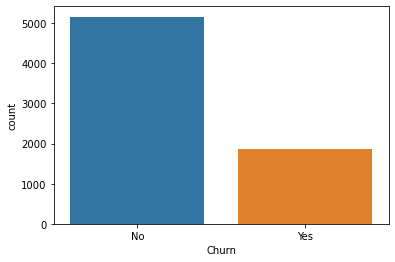

In [10]:
sns.countplot(data=df, x="Churn")

## Exploring numeric columns

C:\Users\Rajat\anaconda3\envs\ml-tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

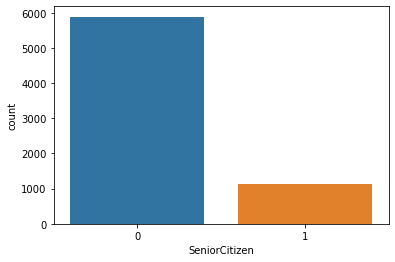

In [11]:
col = num_cols[0]

sns.countplot(df[col])

C:\Users\Rajat\AppData\Local\Temp\ipykernel_11196\1743756501.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=df[col].unique(), rotation=90)
C:\Users\Rajat\AppData\Local\Temp\ipykernel_11196\1743756501.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=df[col].unique(), rotation=90)
C:\Users\Rajat\AppData\Local\Temp\ipykernel_11196\1743756501.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=df[col].unique(), rotation=90)


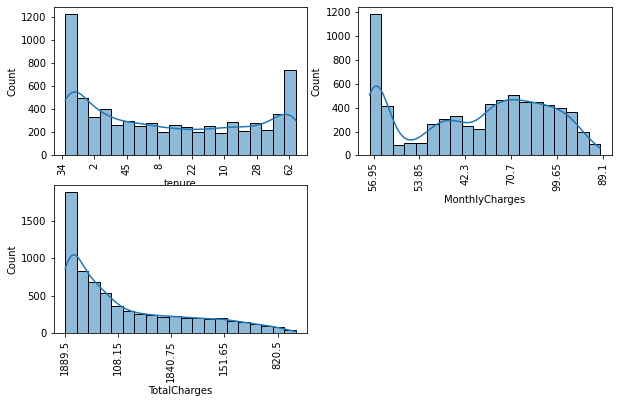

In [12]:
plt.figure(figsize=(10, 6))
for idx, col in enumerate(num_cols[1:]):
    plt.subplot(2, 2, idx + 1)
    plot_kde(df, col)

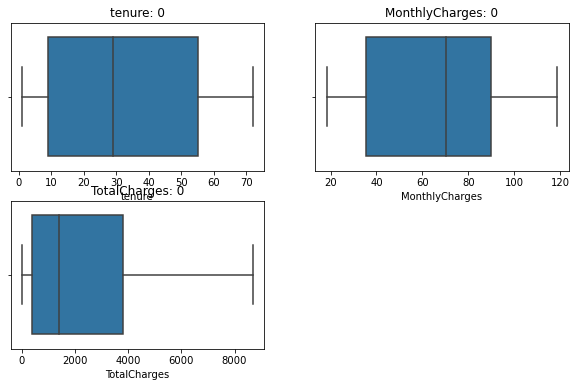

In [13]:
plt.figure(figsize=(10, 6))
for idx, col in enumerate(num_cols[1:]):
    plt.subplot(2, 2, idx + 1)
    plot_outliers(df, col)

## Exploring categorical columns

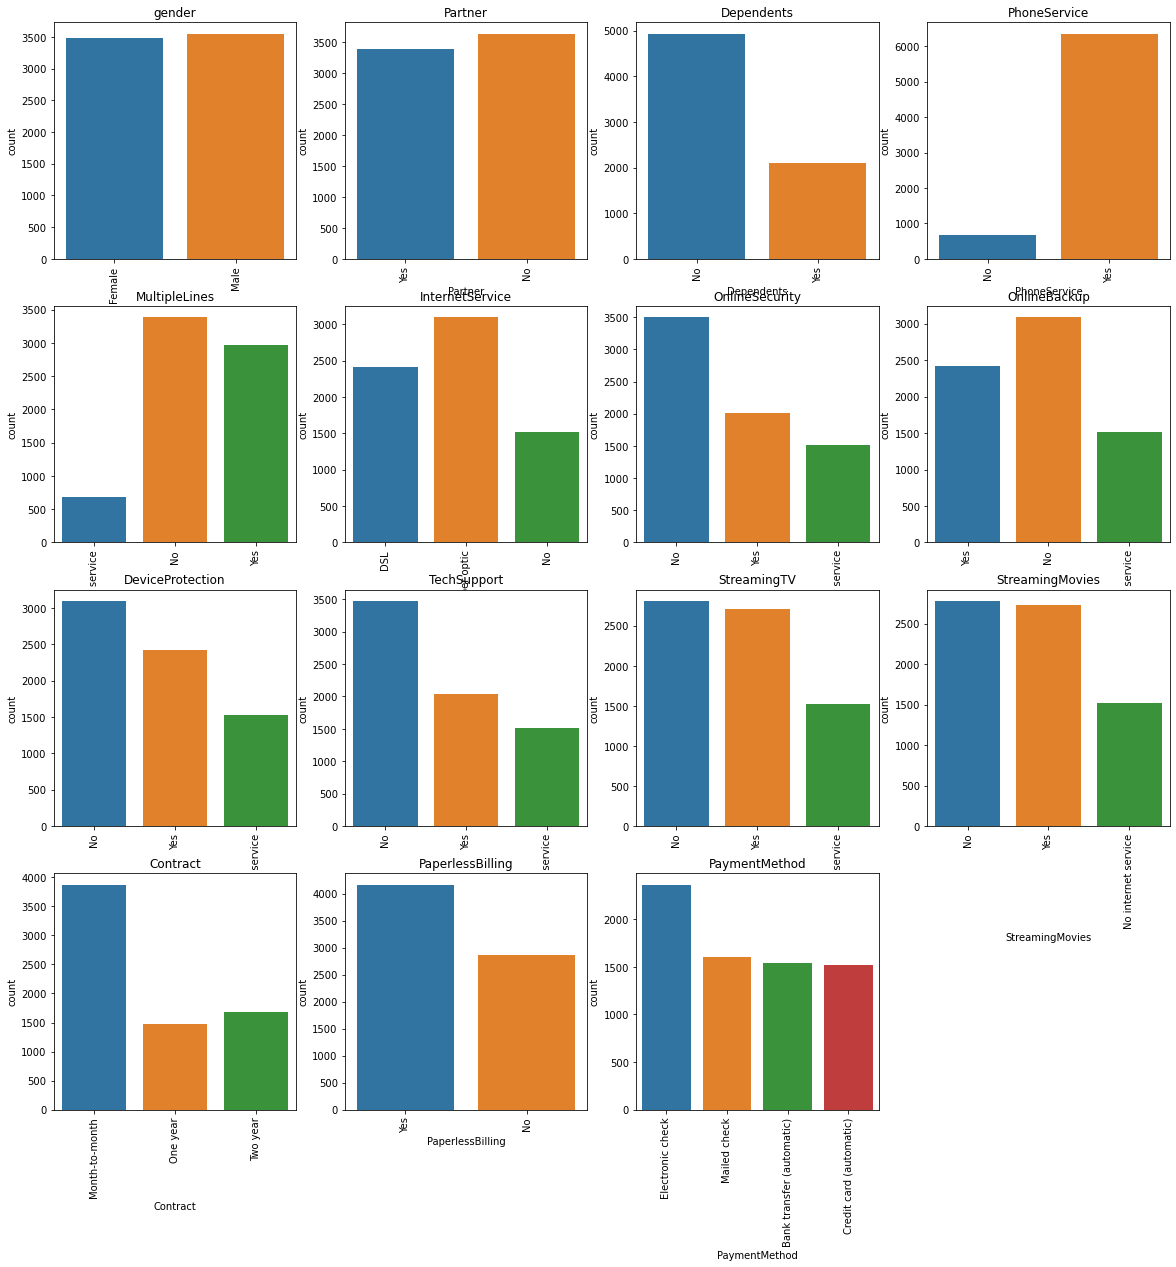

In [14]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(cat_cols[1:-1]):
    plt.subplot(4, 4, idx + 1)
    plt.title(col)
    g = sns.countplot(data=df, x=col)
    g.set_xticklabels(labels=df[col].unique(), rotation=90)

## EDA

<AxesSubplot:>

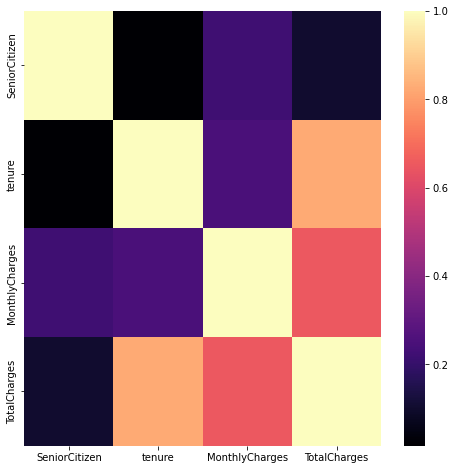

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(data=df.loc[:, "gender":"TotalCharges"].corr(), cmap="magma")

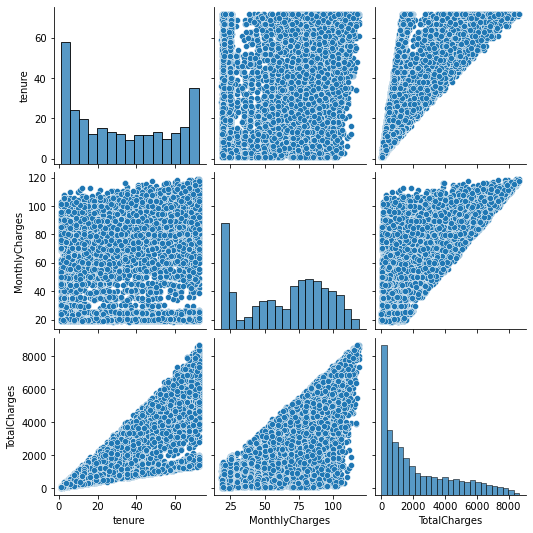

In [16]:
sns.pairplot(data=df.loc[:, "tenure":"TotalCharges"])

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

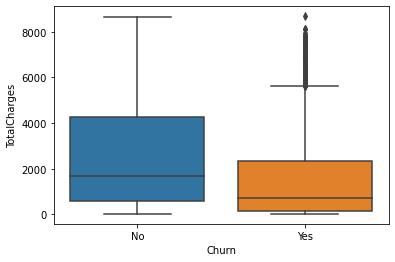

In [17]:
sns.boxplot(data=df, x="Churn", y="TotalCharges")

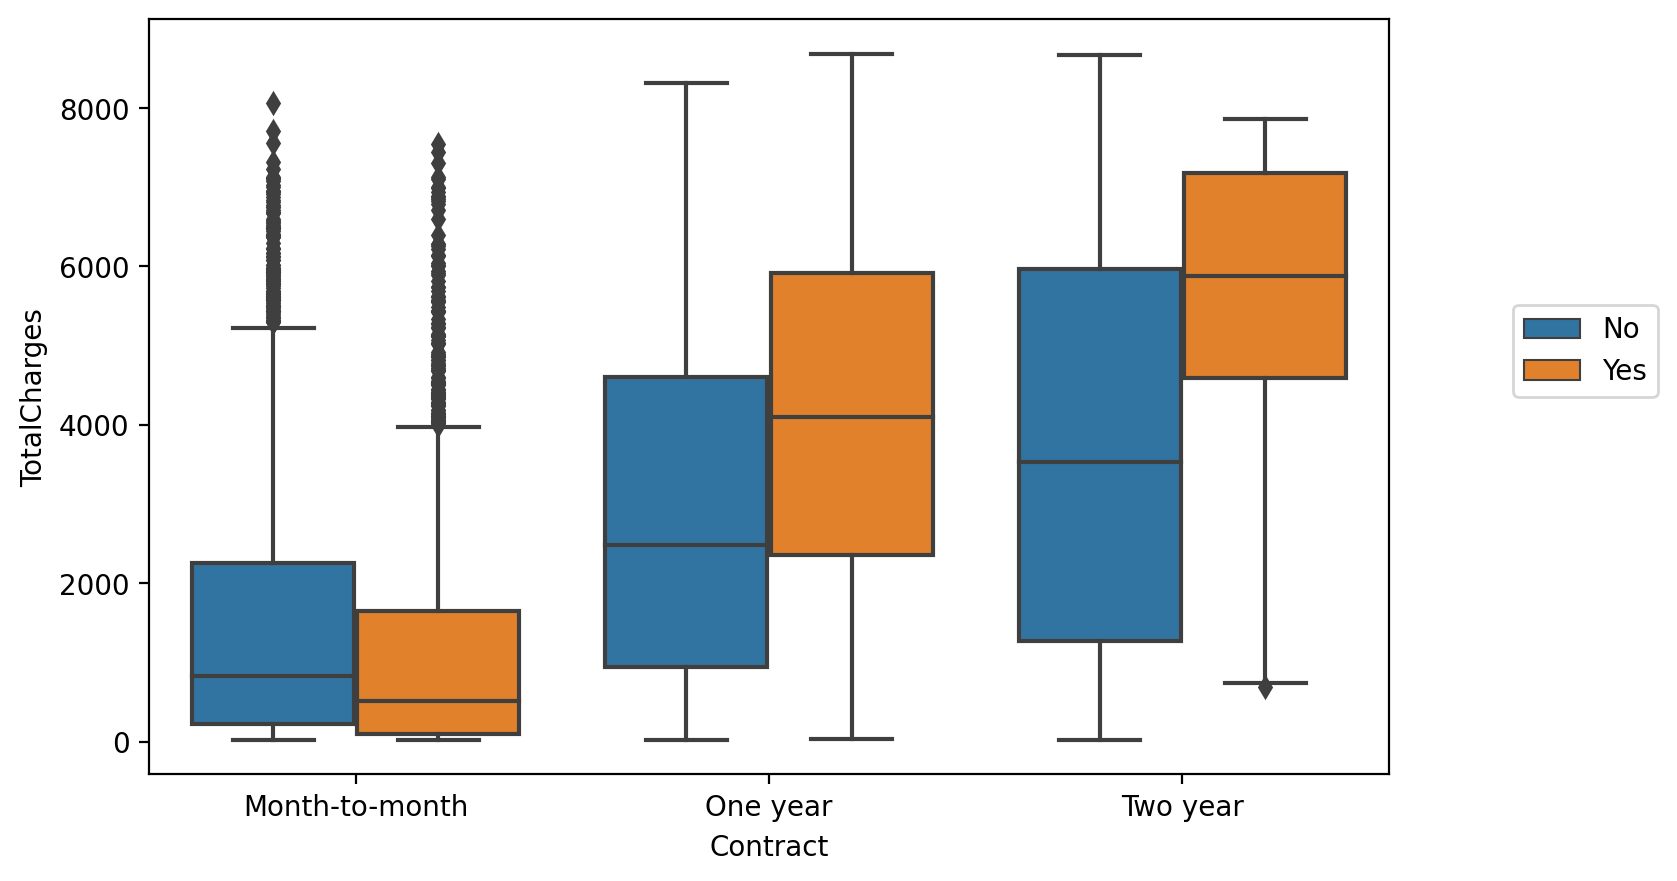

In [18]:
plt.figure(figsize=(8, 5), dpi=200)
sns.boxplot(data=df, x="Contract", y="TotalCharges", hue="Churn")
plt.legend(loc=(1.1, 0.5))

In [19]:
dummies = pd.get_dummies(df[cat_cols[1:]])

corr_churn_yes = dummies.corr()["Churn_Yes"].sort_values().iloc[1:-1]

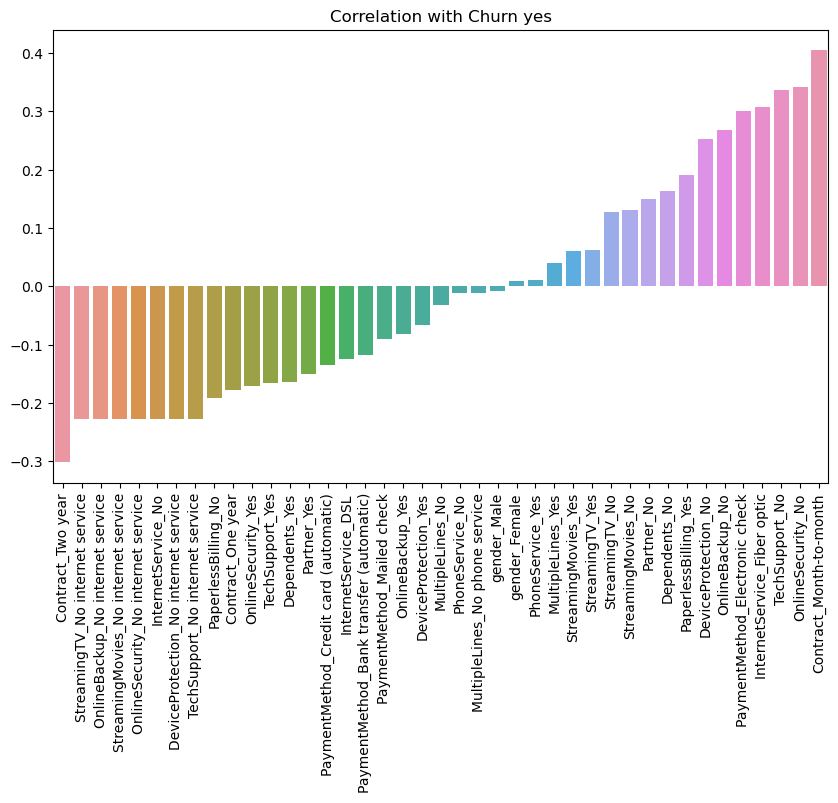

In [20]:
plt.figure(figsize=(10, 6), dpi=100)
plt.title("Correlation with Churn yes")
sns.barplot(x=corr_churn_yes.index, y=corr_churn_yes.values)
plt.xticks(rotation=90);

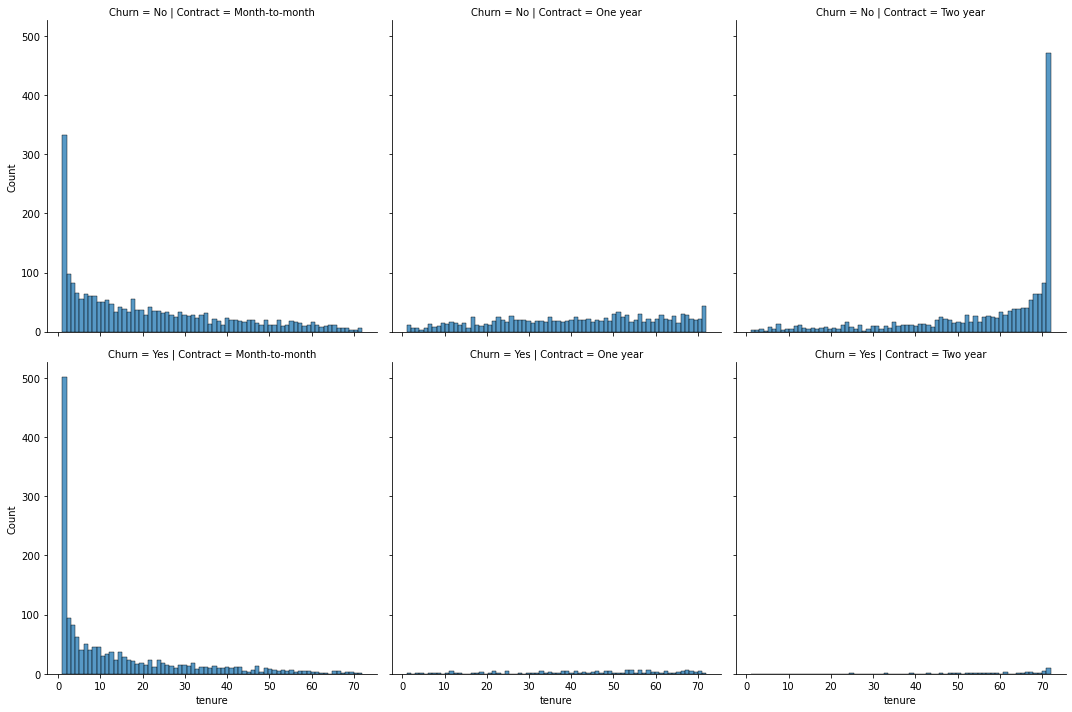

In [21]:
sns.displot(data=df, x="tenure", col="Contract", row="Churn", bins=70)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

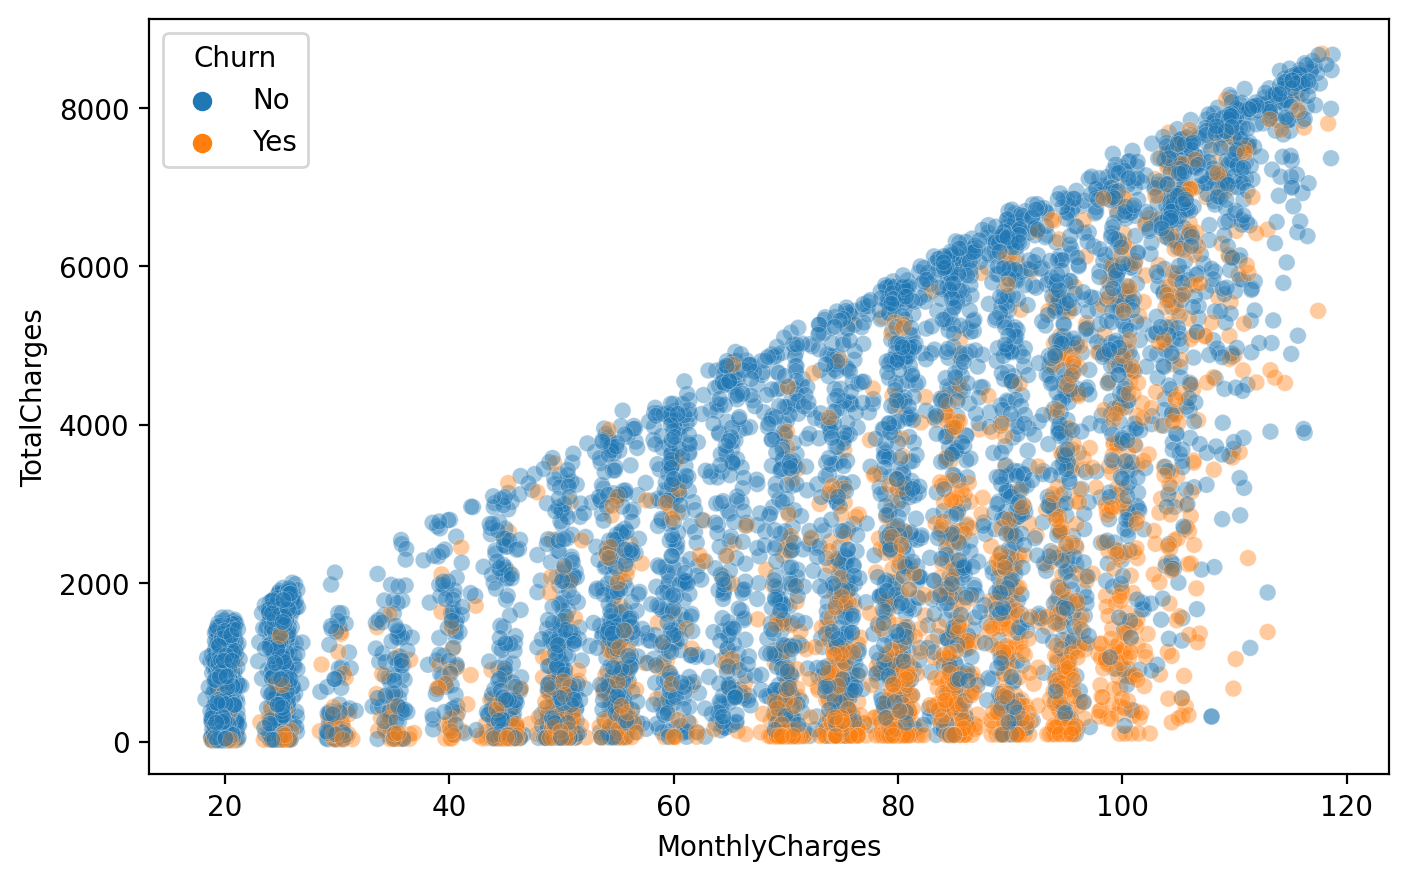

In [22]:
plt.figure(figsize=(8, 5), dpi=200)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn", linewidth=0.2, alpha=0.4)

In [23]:
churn_yes = df.groupby(["Churn", "tenure"]).count().transpose()["Yes"]

In [24]:
churn_no = df.groupby(["Churn", "tenure"]).count().transpose()["No"]

In [25]:
churn_rate = 100 * churn_yes / ( churn_yes + churn_no )

churn_rate = churn_rate.transpose()["customerID"]

<AxesSubplot:xlabel='tenure'>

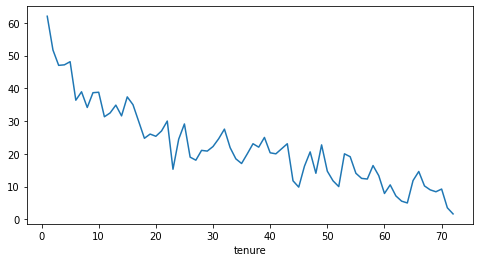

In [26]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=churn_rate.index, y=churn_rate.values)

In [27]:
def cohort(x):
    if x < 13:
        return "0-12 Months"
    elif x < 25:
        return "12-24 Months"
    elif x < 49:
        return "24-48 Months"
    else:
        return "Over 48 Months"

In [28]:
df["tenure_cohort"] = df["tenure"].apply(cohort)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

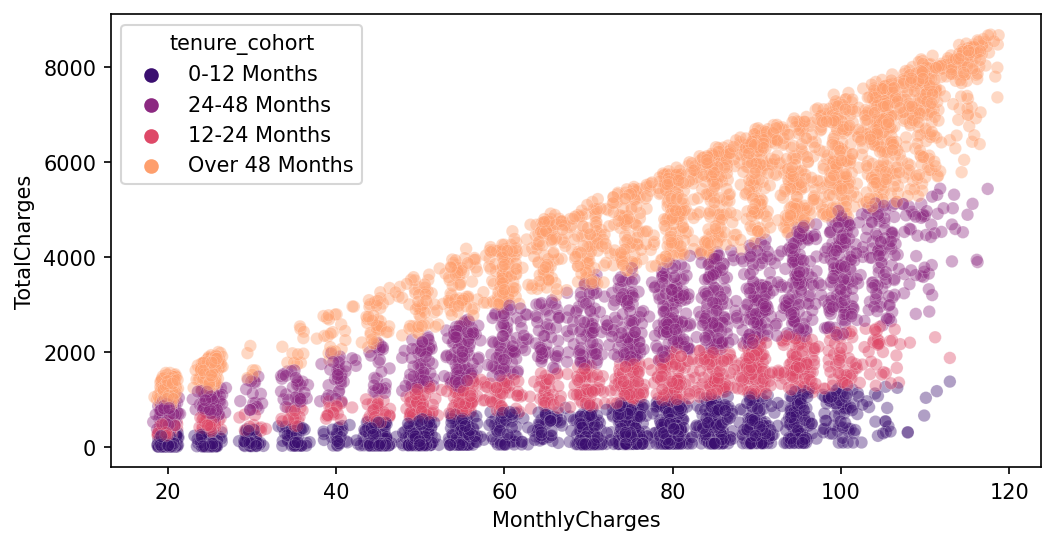

In [29]:
plt.figure(figsize=(8, 4), dpi=150)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="tenure_cohort", palette="magma", alpha=0.4, linewidth=0.2)

<AxesSubplot:xlabel='tenure_cohort', ylabel='count'>

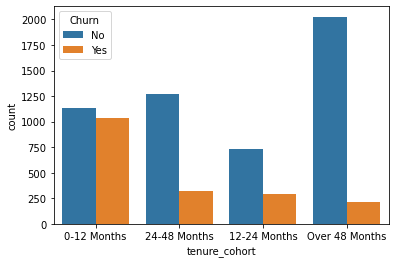

In [30]:
sns.countplot(data=df, x="tenure_cohort", hue="Churn")

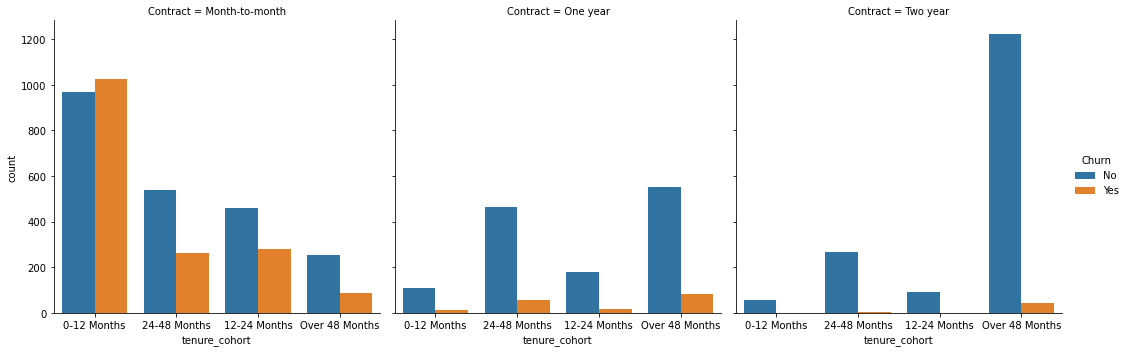

In [31]:
sns.catplot(data=df, x="tenure_cohort", hue="Churn", col="Contract", kind="count")

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


## Cleaning/transforming columns

In [33]:
df["TotalCharges_log"] = df["TotalCharges"].apply(log_transform)

df = df.drop(["customerID"], axis=1)
df = pd.get_dummies(df, drop_first=True)
df["Churn"] = df["Churn_Yes"]

df_train = df.drop(["tenure", "TotalCharges", "Churn_Yes"], axis=1)

df_train.head(3)

,SeniorCitizen,MonthlyCharges,TotalCharges_log,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_cohort_12-24 Months,tenure_cohort_24-48 Months,tenure_cohort_Over 48 Months,Churn
0,0,29.85,3.429137,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,56.95,7.544597,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,0,53.85,4.692723,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [34]:
df_train.to_csv("dataset/data_clean.csv", index=False)